In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Посмотрите формат таблиц

In [3]:
# Загрузка данных
data = pd.read_csv('data.csv')

# Проверим информацию о столбцах
print(data.info())

# Проверим, есть ли пропущенные значения в данных
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None
Дата            0
Склад           0
Контрагент      0
Номенклатура    0
Количество      0
dtype: int64


1. Сразу переведем столбец "Дата" в правильный формат

In [4]:
# Convert 'Дата' column to datetime format
data['Дата'] = pd.to_datetime(data['Дата'], errors='coerce')

2. Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
# Group by 'Дата' and calculate total sales for each date
grouped_df = data.groupby('Дата')['Количество'].sum().reset_index()

3. Вывести несколько первых строк сгруппированных данных

In [6]:
# Display the first few rows of the grouped data
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


4. Нарисуйте график продаж у `grouped_df`

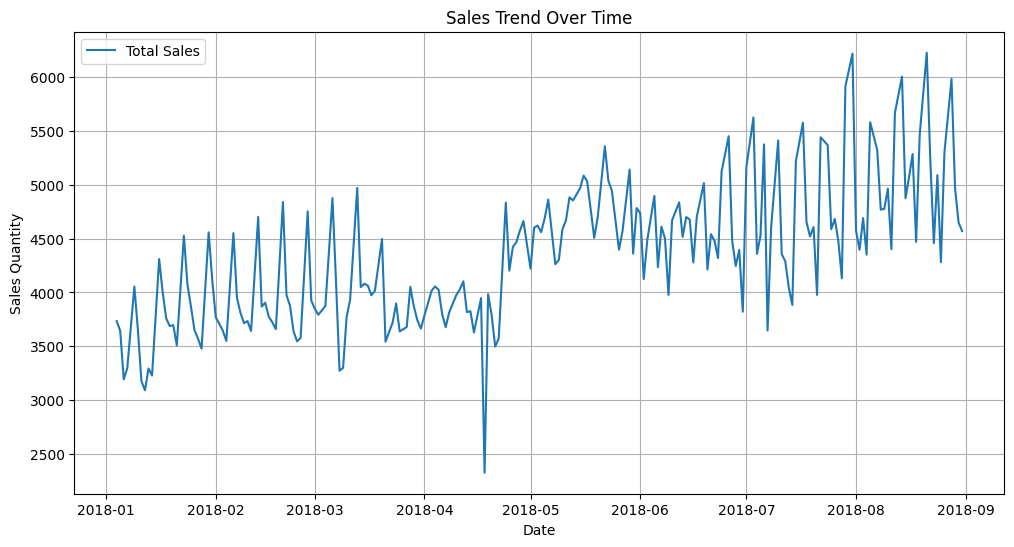

In [7]:
import matplotlib.pyplot as plt

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

5. Опишите что вы видите на графике. Ваша задача - максимально описать график

График показывает рост продаж с января по сентябрь 2018 года.

- Общий тренд восходящий, продажи увеличиваются со временем.

- Регулярные колебания указывают на сезонные изменения спроса.

- Резкие спады и пики могут быть связаны с праздничными или акционными днями.

Таким образом, продажи растут, но с периодическими спадениями и всплесками.

6. Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [8]:
# Identify the row with the maximum sales outlier
max_sales_row = data.loc[data['Количество'].idxmax()]
print(max_sales_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


7. Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [9]:
# Add Month and DayOfWeek columns for filtering
data['Month'] = data['Дата'].dt.month
data['DayOfWeek'] = data['Дата'].dt.dayofweek

# Filter for Warehouse 3, Wednesdays (DayOfWeek = 2), and months June (6), July (7), August (8)
filtered_data = data[(data['Склад'] == 3) & (data['DayOfWeek'] == 2) & (data['Month'].isin([6, 7, 8]))]

# Find the top-selling product by summing sales quantity
top_product = filtered_data.groupby('Номенклатура')['Количество'].sum().idxmax()
top_product_sales = filtered_data.groupby('Номенклатура')['Количество'].sum().max()
print(f"Top product: {top_product}, Total Sales: {top_product_sales}")

Top product: product_1, Total Sales: 2267


8. Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

Weather data loaded successfully. Columns are: Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')


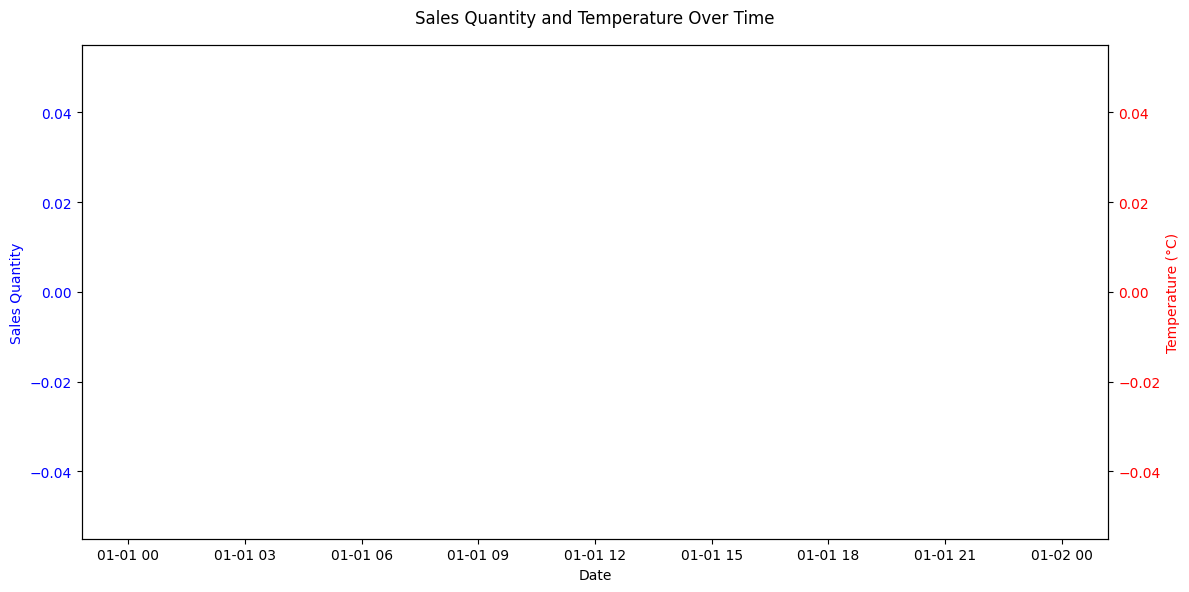

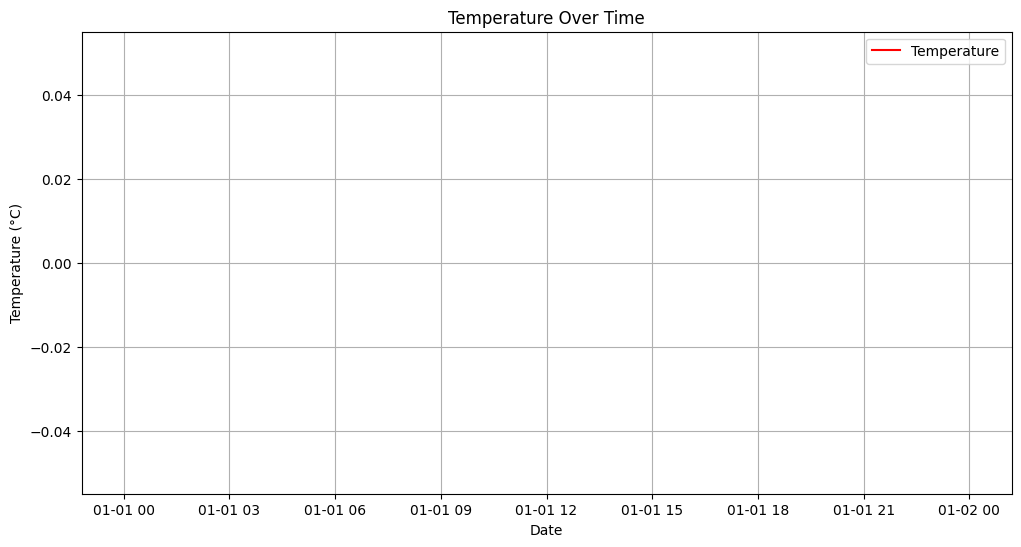

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define path to the weather data file
weather_data_path = 'weather.csv'

# Load the weather data, skipping initial metadata rows
try:
    # Adjusted to skip metadata lines and use updated column names
    weather_data = pd.read_csv(weather_data_path, delimiter=';', skiprows=6, on_bad_lines='skip')
    print("Weather data loaded successfully. Columns are:", weather_data.columns)

    # Check and process if necessary columns are available
    if 'Местное время в Астане' in weather_data.columns and 'T' in weather_data.columns:
        # Rename columns for clarity
        weather_data.rename(columns={'Местное время в Астане': 'Дата', 'T': 'Средняя температура'}, inplace=True)

        # Convert 'Дата' column to datetime format
        weather_data['Дата'] = pd.to_datetime(weather_data['Дата'], errors='coerce')

        # Merge weather data with sales data (grouped_df) on 'Дата'
        merged_df = pd.merge(grouped_df, weather_data[['Дата', 'Средняя температура']], on='Дата', how='inner')

        # Plot both sales and temperature on the same graph
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot sales quantity
        ax1.plot(merged_df['Дата'], merged_df['Количество'], color='b', label='Sales Quantity')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Sales Quantity', color='b')
        ax1.tick_params(axis='y', labelcolor='b')

        # Plot temperature on a secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(merged_df['Дата'], merged_df['Средняя температура'], color='r', label='Temperature')
        ax2.set_ylabel('Temperature (°C)', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        fig.suptitle('Sales Quantity and Temperature Over Time')
        fig.tight_layout()
        plt.show()

        # Plot temperature alone
        plt.figure(figsize=(12, 6))
        plt.plot(merged_df['Дата'], merged_df['Средняя температура'], color='r', label='Temperature')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.title('Temperature Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Required columns 'Местное время в Астане' and 'T' not found in the weather data.")
except Exception as e:
    print("Error loading or processing weather data:", e)